<p style="text-align:center;font-size:38px;color:#EC0F0F;">Therapy Chatbot</p> 

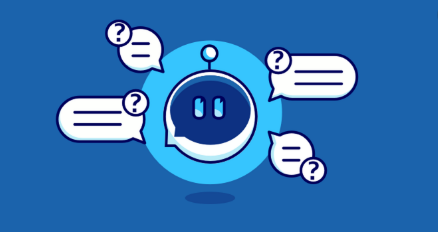


The dataset contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help. We are going to predict if it is flagged or not according to users responses.

## Libraries and Utilities

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from wordcloud import WordCloud, STOPWORDS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
/kaggle/input/deepnlp/Sheet_1.csv
/kaggle/input/deepnlp/Sheet_2.csv


## Loading Data

In [4]:
data = pd.read_csv(r"/kaggle/input/deepnlp/Sheet_1.csv",encoding= "latin1" )
data.drop(["Unnamed: 3","Unnamed: 4","Unnamed: 5",
           "Unnamed: 6","Unnamed: 7",], axis = 1, inplace =True)
data = pd.concat([data["class"],data["response_text"]], axis = 1)

data.dropna(axis=0, inplace =True)
data.head(10)

class                                      response_text
0  not_flagged              I try and avoid this sort of conflict
1      flagged  Had a friend open up to me about his mental ad...
2      flagged  I saved a girl from suicide once. She was goin...
3  not_flagged  i cant think of one really...i think i may hav...
4  not_flagged  Only really one friend who doesn't fit into th...
5  not_flagged  a couple of years ago my friends was going to ...
6      flagged  Roommate when he was going through death and l...
7      flagged  i've had a couple of friends (you could say mo...
8  not_flagged  Listened to someone talk about relationship tr...
9      flagged  I will always listen. I comforted my sister wh...

## 0 to Not Flagged and 1 to Flagged

In [5]:
data["class"] = [1 if each == "flagged" else 0 for each in data["class"]]
data.head()

class                                      response_text
0      0              I try and avoid this sort of conflict
1      1  Had a friend open up to me about his mental ad...
2      1  I saved a girl from suicide once. She was goin...
3      0  i cant think of one really...i think i may hav...
4      0  Only really one friend who doesn't fit into th...

In [6]:
data.response_text[16]

'I have helped advise friends who have faced circumstances similar to mine'

## Regular Expression

- We can remove non-letter characters in our text with Regular Expression method.
- The lower() methods returns the lowercased string from the given string. It converts all uppercase characters to lowercase. If no uppercase characters exist, it returns the original string.

In [7]:
first_text = data.response_text[16]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)

i have helped advise friends who have faced circumstances similar to mine


## Irrelevant Words (Stopwords)

In [8]:
text = nltk.word_tokenize(text)
text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

['helped', 'advise', 'friends', 'faced', 'circumstances', 'similar', 'mine']


## Lemmatization

In [9]:
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)

['help', 'advise', 'friend', 'face', 'circumstance', 'similar', 'mine']


## All Words

In [10]:
description_list = []
for description in data.response_text:
       
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [ ]:
description_list[16]

## Bag of Words

In [11]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 100 Most Used Words: ['addiction', 'advice', 'alone', 'always', 'anxiety', 'anything', 'back', 'best', 'bring', 'call', 'care', 'come', 'comfort', 'could', 'deal', 'depression', 'describe', 'dont', 'end', 'even', 'everything', 'experience', 'face', 'feel', 'find', 'friend', 'get', 'gf', 'girl', 'girlfriend', 'give', 'go', 'good', 'grade', 'happen', 'help', 'helpful', 'issue', 'kid', 'kill', 'know', 'last', 'let', 'life', 'like', 'listen', 'little', 'look', 'lot', 'make', 'many', 'may', 'much', 'need', 'never', 'night', 'offer', 'often', 'one', 'open', 'others', 'people', 'person', 'personal', 'pretty', 'problem', 'really', 'relationship', 'say', 'school', 'see', 'self', 'severe', 'share', 'shit', 'similar', 'simply', 'situation', 'someone', 'sometimes', 'start', 'struggle', 'stuff', 'suicide', 'support', 'talk', 'tell', 'think', 'though', 'time', 'trouble', 'try', 'use', 'want', 'way', 'week', 'well', 'work', 'would', 'year']


## Naive Bayes

In [12]:
y = data.iloc[:,0].values
x = sparce_matrix

### Train Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [23]:
print(y)

[0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0]


### Fit the Model

In [24]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print("Accuracy: {}".format(round(nb.score(y_pred.reshape(-1,1),y_test),2)))

Accuracy: 0.75


In [36]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Assuming x_train, x_test, y_train, y_test, and sparse_matrix are defined

# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy_nb = nb.score(x_test, y_test)
print("Gaussian Naive Bayes Accuracy: {:.2f}".format(accuracy_nb))

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(x_train, y_train)
accuracy_svm = svm.score(x_test, y_test)
print("SVM Accuracy: {:.2f}".format(accuracy_svm))

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1)))  # Assuming 1D input
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_lstm = lstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("LSTM Model Accuracy: {:.2f}".format(accuracy_lstm))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn = cnn_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("CNN Model Accuracy: {:.2f}".format(accuracy_cnn))

# CNN-BiLSTM Model
cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Bidirectional(LSTM(64)))
cnn_bilstm_model.add(Dense(1, activation='sigmoid'))
cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_bilstm_model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn_bilstm = cnn_bilstm_model.evaluate(np.expand_dims(x_test, axis=-1), y_test)[1]
print("CNN-BiLSTM Model Accuracy: {:.2f}".format(accuracy_cnn_bilstm))

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy_logreg = logreg.score(x_test, y_test)
print("Logistic Regression Accuracy: {:.2f}".format(accuracy_logreg))

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy_rf = rf.score(x_test, y_test)
print("Random Forest Accuracy: {:.2f}".format(accuracy_rf))

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy_dt = dt.score(x_test, y_test)
print("Decision Tree Accuracy: {:.2f}".format(accuracy_dt))

Gaussian Naive Bayes Accuracy: 0.75
SVM Accuracy: 0.81
1/1 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8750
LSTM Model Accuracy: 0.88
1/1 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6875
CNN Model Accuracy: 0.69
1/1 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8125
CNN-BiLSTM Model Accuracy: 0.81
Logistic Regression Accuracy: 0.69
Random Forest Accuracy: 0.81
Decision Tree Accuracy: 0.75
